In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

from house_config import TARGET_VARIABLE
from house_preprocessing import (
    read_original_data,
    select_numeric_features,
    check_missing_values,
    check_train_test_data
)

In [2]:
## Data pipeline
original_data = read_original_data()
numeric_data = select_numeric_features(original_data)
check_missing_values(numeric_data)

target_data = original_data[TARGET_VARIABLE]

X_train, X_test, y_train, y_test = train_test_split(
    numeric_data,
    target_data,
    test_size=0.2,
    random_state=42
)
check_train_test_data(X_train, X_test)

Rows: 1460, Columns: 81
Rows: 1460, Columns: 33
No Missing values.
X_train and X_test are ready for modeling.


In [3]:
## Model training as pipeline
pipe = Pipeline([
    ("linreg", LinearRegression())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('linreg', LinearRegression())])

Model train accuracy: 0.8034289860818126
Model test accuracy: 0.8184946026286619


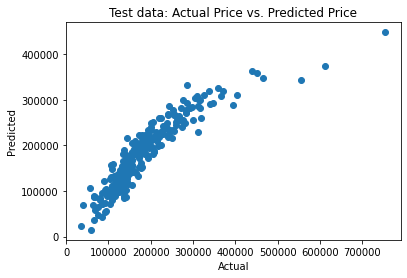

In [4]:
## Model evaluation
print(f"Model train accuracy: {pipe.score(X_train, y_train)}")
print(f"Model test accuracy: {pipe.score(X_test, y_test)}")

plt.scatter(y_test, pipe.predict(X_test))
plt.title("Test data: Actual Price vs. Predicted Price")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()